In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import * 

In [40]:
def analyse_compression(model, datax, datay, dtype="mnist", title="", classes=range(10)):
    decoded = model.predict(datax)
    nb_classes = len(classes)

    show = show_mnist if dtype == "mnist" else show_usps

    examples = np.zeros(nb_classes, dtype=np.int64)
    for i, v in enumerate(classes):
        examples[i] = np.where(datay == v)[0][0]

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2, nb_classes, i + 1)
        show(datax[x])
        plt.subplot(2, nb_classes, i + nb_classes + 1)
        show(decoded[x])

    plt.title(title)
    plt.show()


def plot_data(datax, datay, title):
    examples = np.zeros(10, dtype=np.int64)

    for i in range(10):
        examples[i] = np.where(datay == i)[0][0]

    plt.figure(figsize=(16, 2))
    for i, x in enumerate(examples):
        plt.subplot(1, 10, i + 1)
        show_mnist(datax[x])
        plt.xticks([])
        plt.yticks([])

    plt.suptitle(title)

In [41]:
(train_X, train_y), (test_X, test_y) = load_mnist()

# classes = [7, 2, 3, 4, 5]
# train_X, train_y = get_mnist(classes, train_X, train_y)
# test_X, test_y = get_mnist(classes, test_X, test_y)

onehot = to_onehot(train_y)

train_X.shape

(60000, 784)

In [122]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=256, nb_iter=2000, gradient_step=1e-2, batch_size=1000, early_stop=1e-6)

print(f"Training classification score : {mc.score(train_X, train_y)}")
print(f"Testing classification score : {mc.score(test_X, test_y)}")

Training classification score : 0.8939333333333334
Testing classification score : 0.9016


## Autoencoder

In [68]:
ae10 = AutoEncoder()
ae10.fit(train_X, train_X, hidden=[256], latent=10, nb_iter=3000, gradient_step=2e-4, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


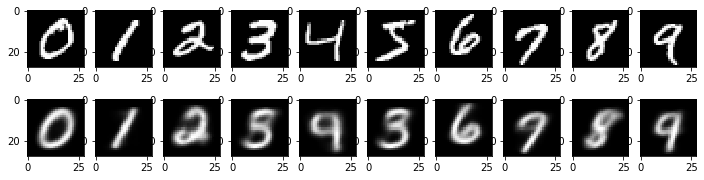

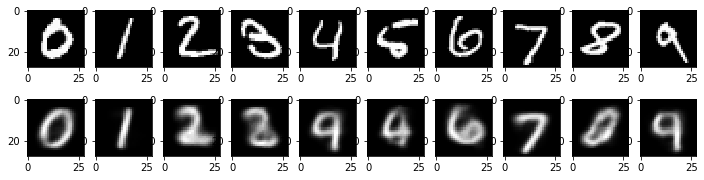

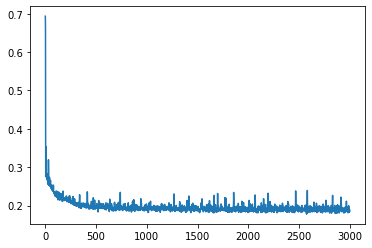

0.6836166666666667
0.6829


In [69]:
analyse_compression(ae10, train_X, train_y, dtype="mnist")
analyse_compression(ae10, test_X, test_y, dtype="mnist")

timesteps = np.arange(len(ae10.train_losses))
plt.plot(timesteps, ae10.train_losses)
plt.show()

print(mc.score(ae10.predict(train_X), train_y))
print(mc.score(ae10.predict(test_X), test_y))

In [57]:
ae28 = AutoEncoder()
ae28.fit(train_X, train_X, hidden=[256], latent=28, nb_iter=3000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


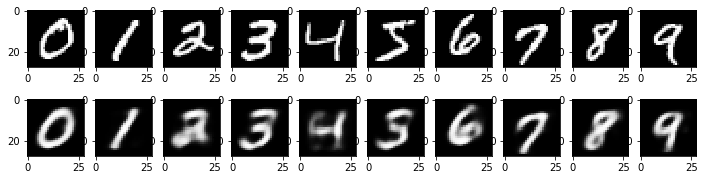

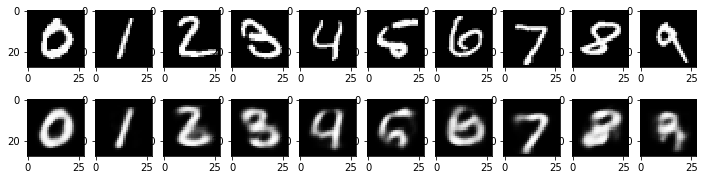

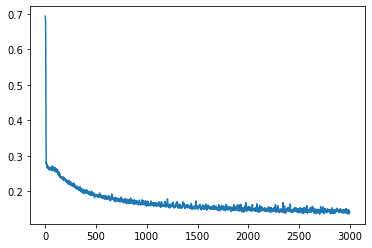

0.8472
0.8534


In [59]:
analyse_compression(ae28, train_X, train_y, dtype="mnist")
analyse_compression(ae28, test_X, test_y, dtype="mnist")

timesteps = np.arange(len(ae28.train_losses))
plt.plot(timesteps, ae28.train_losses)
plt.show()

print(mc.score(ae28.predict(train_X), train_y))
print(mc.score(ae28.predict(test_X), test_y))

In [52]:
ae128 = AutoEncoder()
ae128.fit(train_X, train_X, hidden=[256], latent=128, nb_iter=3000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


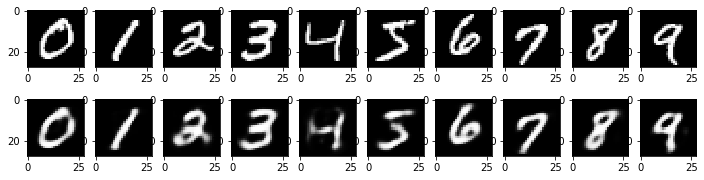

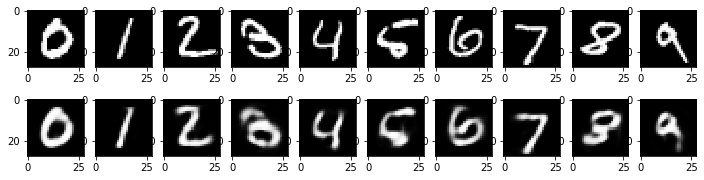

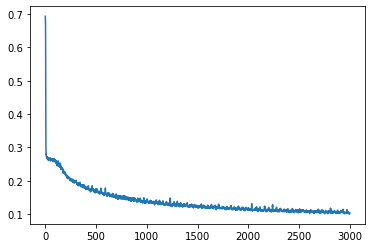

0.87295
0.8778


In [53]:
analyse_compression(ae128, train_X, train_y, dtype="mnist")
analyse_compression(ae128, test_X, test_y, dtype="mnist")

timesteps = np.arange(len(ae128.train_losses))
plt.plot(timesteps, ae128.train_losses)
plt.show()

print(mc.score(ae128.predict(train_X), train_y))
print(mc.score(ae128.predict(test_X), test_y))

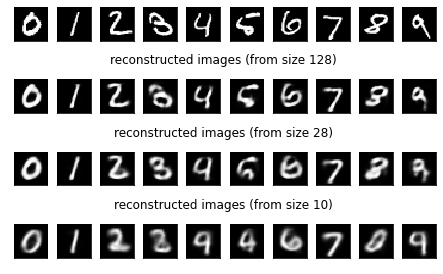

In [120]:
datax, datay = test_X, test_y
decoded128 = ae128.predict(datax)
decoded28 = ae28.predict(datax)
decoded10 = ae10.predict(datax)

rd = "reconstructed images (from size"
titles = ["original images", rd + " 128)", rd + " 28)", rd + " 10)"]
datas = [datax, decoded128, decoded28, decoded10]

examples = [np.where(datay == i)[0][0] for i in range(10)]

fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(4, 1)

for subfig, title, data in zip(subfigs.flat, titles, datas):
    subfig.suptitle(title)
    axs = subfig.subplots(1, 10)
    for i, (ax, x) in enumerate(list(zip(axs.flat, examples))):
        ax.imshow(data[x].reshape(28, 28), interpolation="nearest", cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig("plots/autoencoder/reconstruted_images.png")
plt.show()

## Denoiser

In [86]:
noise_amount = 0.25
train_Xnoised25 = noise_data(train_X, noise_amount)
test_Xnoised25 = noise_data(test_X, noise_amount)

ae_noise25 = AutoEncoder()
ae_noise25.fit(train_Xnoised25, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


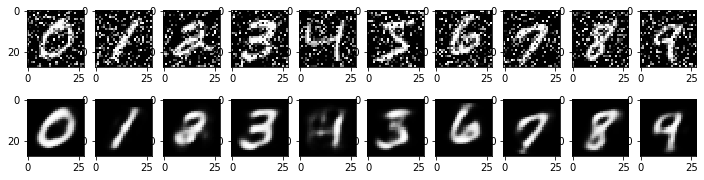

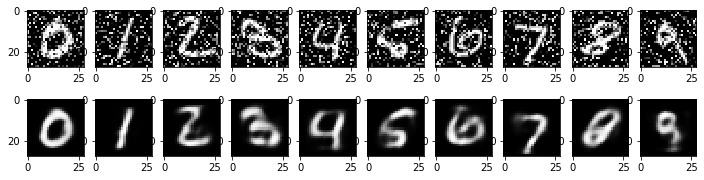

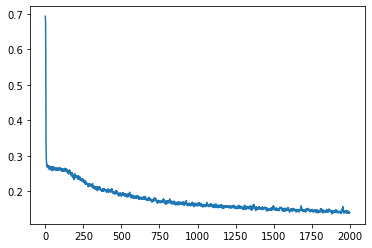

0.8581
0.8668


In [113]:
analyse_compression(ae_noise25, train_Xnoised25, train_y, dtype="mnist")
analyse_compression(ae_noise25, test_Xnoised25, test_y, dtype="mnist")

timesteps = np.arange(len(ae_noise25.train_losses))
plt.plot(timesteps, ae_noise25.train_losses)
plt.show()

print(mc.score(ae_noise25.predict(train_X), train_y))
print(mc.score(ae_noise25.predict(test_X), test_y))

In [88]:
noise_amount = 0.5
train_Xnoised50 = noise_data(train_X, noise_amount)
test_Xnoised50 = noise_data(test_X, noise_amount)

ae_noise50 = AutoEncoder()
ae_noise50.fit(train_Xnoised50, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


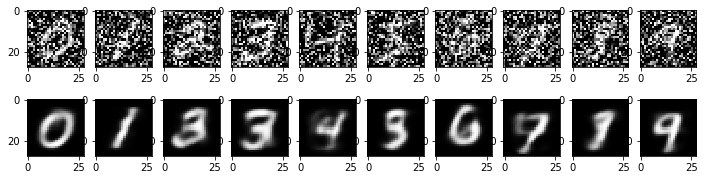

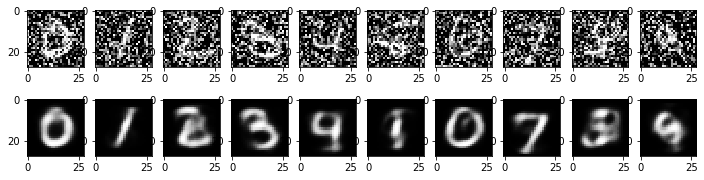

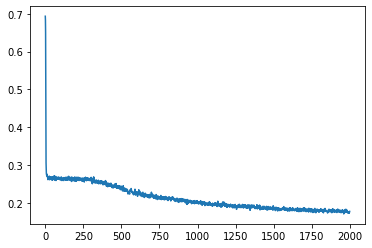

0.78745
0.7953


In [89]:
analyse_compression(ae_noise50, train_Xnoised50, train_y, dtype="mnist")
analyse_compression(ae_noise50, test_Xnoised50, test_y, dtype="mnist")

timesteps = np.arange(len(ae_noise50.train_losses))
plt.plot(timesteps, ae_noise50.train_losses)
plt.show()

print(mc.score(ae_noise50.predict(train_X), train_y))
print(mc.score(ae_noise50.predict(test_X), test_y))

In [90]:
noise_amount = 0.75
train_Xnoised75 = noise_data(train_X, noise_amount)
test_Xnoised75 = noise_data(test_X, noise_amount)

ae_noise75 = AutoEncoder()
ae_noise75.fit(train_Xnoised75, train_X, hidden=[256], latent=128, nb_iter=2000, gradient_step=5e-5, batch_size=500, early_stop=None)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


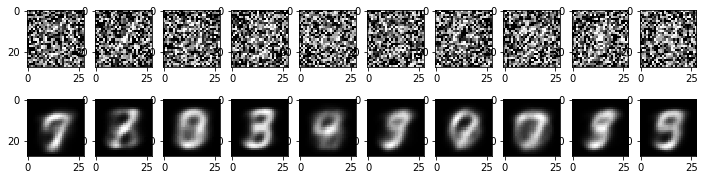

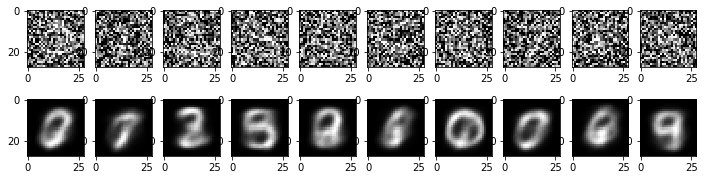

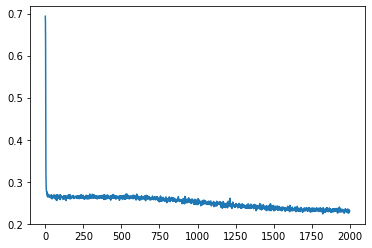

0.6723833333333333
0.6799


In [91]:
analyse_compression(ae_noise75, train_Xnoised75, train_y, dtype="mnist")
analyse_compression(ae_noise75, test_Xnoised75, test_y, dtype="mnist")

timesteps = np.arange(len(ae_noise75.train_losses))
plt.plot(timesteps, ae_noise75.train_losses)
plt.show()

print(mc.score(ae_noise75.predict(train_X), train_y))
print(mc.score(ae_noise75.predict(test_X), test_y))

In [114]:
datax, datay = test_X, test_y
decoded25 = ae_noise25.predict(test_Xnoised25)
decoded50 = ae_noise50.predict(test_Xnoised50)
decoded75 = ae_noise75.predict(test_Xnoised75)

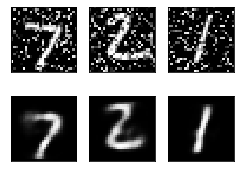

In [117]:
plt.figure(figsize=(4, 3))
for i in range(3):
    plt.subplot(230 + 1 + i)
    show_mnist(test_Xnoised25[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(230 + 4 + i)
    show_mnist(decoded25[i])
    plt.xticks([])
    plt.yticks([])

plt.savefig("plots/autoencoder/denoiser_pred25")
plt.show()

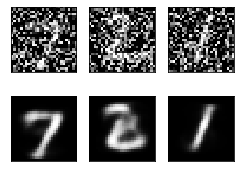

In [119]:
plt.figure(figsize=(4, 3))
for i in range(3):
    plt.subplot(230 + 1 + i)
    show_mnist(test_Xnoised50[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(230 + 4 + i)
    show_mnist(decoded50[i])
    plt.xticks([])
    plt.yticks([])

plt.savefig("plots/autoencoder/denoiser_pred50")
plt.show()

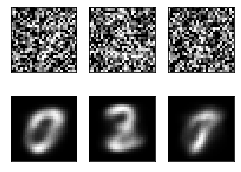

In [118]:
plt.figure(figsize=(4, 3))
for i in range(3):
    plt.subplot(230 + 1 + i)
    show_mnist(test_Xnoised75[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(230 + 4 + i)
    show_mnist(decoded75[i])
    plt.xticks([])
    plt.yticks([])

plt.savefig("plots/autoencoder/denoiser_pred75")
plt.show()